
<img src=https://www.iteda.cnea.gov.ar/sites/default/files/garland_iteda_logo.png align='left' height=115>

<img src=https://www.facet.unt.edu.ar/facetinforma/wp-content/uploads/sites/9/2015/11/it-OP1-Transparente.png align='right' height=115>


# Análisis Estadístico de Datos - 2023

# Elipse 1σ de la distribución normal bivariada

In [ ]:
import math
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

Parámetros de la distribución binormal

In [ ]:
mu1 = 0
mu2 = 0
sigma1 = 1

In [ ]:
# Sin correlación y σ₂ = σ₁
# sigma2 = sigma1
# rho = 0

In [ ]:
# Sin correlación y σ₂ = σ₁/2
# sigma2 = sigma1 / 2
# rho = 0

In [ ]:
# Correlación positiva
sigma2 = sigma1
rho = 0.95

In [ ]:
# Correlación negativa
# sigma2 = sigma1
# rho = -0.95

Parámetro μ en notación vectorial

In [ ]:
mu = np.array([mu1, mu2])
print(mu)

[0 0]


Matriz de covarianza

In [ ]:
var1 = sigma1*sigma1
var2 = sigma2*sigma2
cova12 = rho*sigma1*sigma2

In [ ]:
cova = np.array([[var1, cova12],
                 [cova12, var2]])
print(cova)

[[1.   0.95]
 [0.95 1.  ]]


In [ ]:
hesse = la.inv(cova)
print(hesse)

[[10.25641026 -9.74358974]
 [-9.74358974 10.25641026]]


Diagonalización de la matriz de covarianza

In [ ]:
autovalores, autovectores = la.eigh(hesse)

In [ ]:
autovectores

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [ ]:
autovalor1 = autovalores[0]
autovector1 = autovectores[:,0]
print(autovalor1), print(autovector1)


0.5128205128205137
[-0.70710678 -0.70710678]


(None, None)

In [ ]:
autovalor2 = autovalores[1]
autovector2 = autovectores[:,1]
print(autovalor2), print(autovector2)

19.999999999999993
[-0.70710678  0.70710678]


(None, None)

## Elipses de covarianza

Ancho y alto

In [ ]:
radio1 = 1 / np.sqrt(autovalor1)
radio2 = 1 / np.sqrt(autovalor2)
ancho = 2*radio1
altura = 2*radio2
print("radio1 = ", radio1)
print("radio2 = ", radio2)

radio1 =  1.3964240043768932
radio2 =  0.223606797749979


Inclinación

In [ ]:
autovector1_x = autovector1[0]
autovector1_y = autovector1[1]
theta_rad = np.arctan2(autovector1_y, autovector1_x)
theta_deg = math.degrees(theta_rad)
print(theta_deg)

-135.0


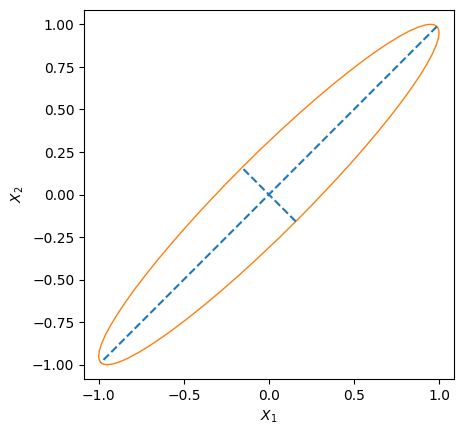

In [ ]:
fig, ax = plt.subplots()
# elipse de 1 sigma
elipse_1sigma = Ellipse(mu, width=ancho, height=altura, angle=theta_deg, fc='none', ec='tab:orange')
ax.add_patch(elipse_1sigma)

# semi-eje mayor
x = np.array([-autovector1[0], autovector1[0]]) * radio1
y = np.array([-autovector1[1], autovector1[1]]) * radio1
ax.plot(x, y, color='tab:blue', ls='--')
# semi-eje menor
x = np.array([-autovector2[0], autovector2[0]]) * radio2
y = np.array([-autovector2[1], autovector2[1]]) * radio2
ax.plot(x, y, color='tab:blue', ls='--')

# formato
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
plt.axis('scaled')
plt.show()

In [ ]:
# Return the coordinates of a covariance ellipse
def get_ellipse(center, cova, nsigma=1, npoints=1000):
    cholesky_l = np.linalg.cholesky(cova)
    t = np.linspace(0, 2 * np.pi, npoints)
    circle = np.column_stack([np.cos(t), np.sin(t)])
    ellipse = nsigma * circle @ cholesky_l.T + center
    return ellipse.T

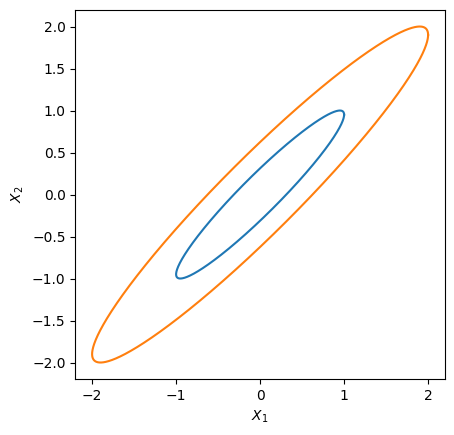

In [ ]:
fig2, ax2 = plt.subplots()
elipse_1sigma = get_ellipse([0, 0], cova, nsigma=1)
ax2.plot(elipse_1sigma[0,:], elipse_1sigma[1,:] )
elipse_2sigma = get_ellipse([0, 0], cova, nsigma=2)
ax2.plot(elipse_2sigma[0,:], elipse_2sigma[1,:] )
ax2.set_xlabel('$X_1$')
ax2.set_ylabel('$X_2$')
plt.axis('scaled')
plt.show()


array([[1.        , 0.99998022, 0.99992089, ..., 0.99992089, 0.99998022,
        1.        ],
       [0.95      , 0.95194509, 0.95385251, ..., 0.94599717, 0.94801734,
        0.95      ]])